In [2]:
from tiled.client import from_uri
import matplotlib.pyplot as plt
c = from_uri("http://tld:8000")

In [17]:
def find_latest():
    keys= list(c.keys())
    for key in keys[::-1]:
        if "primary" in c[key]:
            return c[key]

In [18]:
run = find_latest()

In [21]:
run.metadata

{'start': {'plan_name': 'subs_wrapper',
           'plan_type': 'generator',
           'scan_id': 5,
           'time': 1719160987.5519967,
           'uid': '6a59ab32-9c8f-4cee-9ab8-f8b5a30ce8ce',
           'versions': {'bluesky': '1.12.0', 'ophyd': '1.9.0'}},
 'stop': {'exit_status': 'success',
          'num_events': {'primary': 1},
          'reason': '',
          'run_start': '6a59ab32-9c8f-4cee-9ab8-f8b5a30ce8ce',
          'time': 1719161000.8151305,
          'uid': '8198804a-e76e-4941-930d-83e5bb4b83ee'},
 'summary': {'datetime': datetime.datetime(2024, 6, 23, 16, 43, 7, 551997, tzinfo=datetime.timezone.utc),
             'duration': 13.263133764266968,
             'plan_name': 'subs_wrapper',
             'scan_id': 5,
             'stream_names': ['primary'],
             'timestamp': 1719160987.5519967,
             'uid': '6a59ab32-9c8f-4cee-9ab8-f8b5a30ce8ce'}}

In [22]:
arr = run['primary']['data'].read()

In [23]:
arr

<xarray.Dataset> Size: 10kB
Dimensions:                   (time: 1, dim_0: 3, dim_1: 6, dim_2: 2, dim_3: 650)
Coordinates:
  * time                      (time) float64 8B 1.719e+09
Dimensions without coordinates: dim_0, dim_1, dim_2, dim_3
Data variables:
    wafer_measurement_edx     (time, dim_0) float64 24B 0.8082 0.1019 0.08988
    wafer_measurement_phases  (time, dim_1) float64 48B 0.1301 0.0 ... 2.178e-05
    wafer_measurement_ioq     (time, dim_2, dim_3) float64 10kB 15.0 ... 8.25...
    wafer_y                   (time) int64 8B 0
    wafer_x                   (time) int64 8B -2
Attributes:
    stream_name:  primary

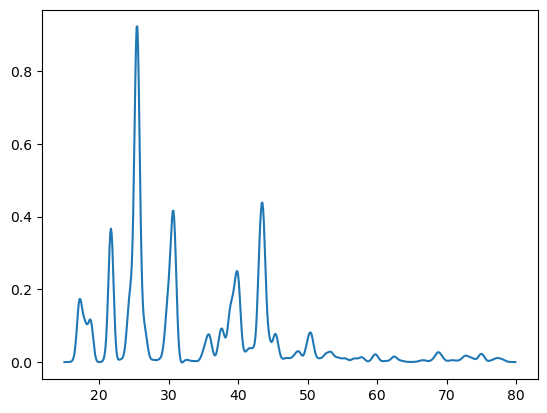

In [26]:
plt.plot(arr["wafer_measurement_ioq"][0,0,:], arr["wafer_measurement_ioq"][0,1,:])